# Part I - (Dataset Exploration Title: Loan Data from Prosper)
## by Uchenna Chinenye Nwajideobi

## Introduction
> This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others from Prosper Loan Dataset. Prosper or Prosper Marketplace Inc. is a San Francisco, California based company specializing in loans at low interest rates to the borrowers. In this dataset, we are using the data from Posper to analyse and find pattern in the Prosper data.


## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# load in the dataset into a pandas dataframe
loan = pd.read_csv('prosperLoanData.csv')

In [3]:
# overview of data shape and composition
print(loan.shape)
print(loan.head(7))

(113937, 81)
                ListingKey  ListingNumber            ListingCreationDate  \
0  1021339766868145413AB3B         193129  2007-08-26 19:09:29.263000000   
1  10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   
2  0EE9337825851032864889A          81716  2007-01-05 15:00:47.090000000   
3  0EF5356002482715299901A         658116  2012-10-22 11:02:35.010000000   
4  0F023589499656230C5E3E2         909464  2013-09-14 18:38:39.097000000   
5  0F05359734824199381F61D        1074836  2013-12-14 08:26:37.093000000   
6  0F0A3576754255009D63151         750899  2013-04-12 09:52:56.147000000   

  CreditGrade  Term LoanStatus           ClosedDate  BorrowerAPR  \
0           C    36  Completed  2009-08-14 00:00:00      0.16516   
1         NaN    36    Current                  NaN      0.12016   
2          HR    36  Completed  2009-12-17 00:00:00      0.28269   
3         NaN    36    Current                  NaN      0.12528   
4         NaN    36    Current        

In [4]:
# Subset the dataframe by selecting features of interest
cols = ['LoanOriginalAmount', 'BorrowerAPR', 'StatedMonthlyIncome', 'Term', 'ProsperRating (Alpha)', 
        'EmploymentStatus', 'IsBorrowerHomeowner']
loan_sub = loan[cols]

In [5]:
loan_sub.head()

,LoanOriginalAmount,BorrowerAPR,StatedMonthlyIncome,Term,ProsperRating (Alpha),EmploymentStatus,IsBorrowerHomeowner
0,9425,0.16516,3083.333333,36,NaN,Self-employed,True
1,10000,0.12016,6125.000000,36,A,Employed,False
2,3001,0.28269,2083.333333,36,NaN,Not available,False
3,10000,0.12528,2875.000000,36,A,Employed,True
4,15000,0.24614,9583.333333,36,D,Employed,True


In [6]:
# descriptive statistics for numeric variables
loan_sub.describe()

,LoanOriginalAmount,BorrowerAPR,StatedMonthlyIncome,Term
count,113937.00000,113912.000000,1.139370e+05,113937.000000
mean,8337.01385,0.218828,5.608026e+03,40.830248
std,6245.80058,0.080364,7.478497e+03,10.436212
min,1000.00000,0.006530,0.000000e+00,12.000000
25%,4000.00000,0.156290,3.200333e+03,36.000000
50%,6500.00000,0.209760,4.666667e+03,36.000000
75%,12000.00000,0.283810,6.825000e+03,36.000000
max,35000.00000,0.512290,1.750003e+06,60.000000


In [7]:
# drop column of loans with missing borrower APR information
loan_sub = loan_sub[~loan_sub.BorrowerAPR.isna()]

In [8]:
loan_sub.isna().sum()

LoanOriginalAmount           0
BorrowerAPR                  0
StatedMonthlyIncome          0
Term                         0
ProsperRating (Alpha)    29059
EmploymentStatus          2230
IsBorrowerHomeowner          0
dtype: int64

### What is the structure of your dataset?

> The dataset contains 113,937 loans with 81 features (including LoanOriginalAmount, BorrowerAPR, StatedMonthlyIncome, Term, ProsperRating (Alpha), EmploymentStatus and others variables)

### What is/are the main feature(s) of interest in your dataset?

> My main feature of interest is figureing out what features are best for predicting the borrower's Annual Percentage Rate (APR) for the loan.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I expect that the total-loan amount will have a negative effect on the APR of the loan: the larger the total-loan amount, the lower the APR. I also think that the borrowers stated-monthly-income, loan-term, Prosper-rating, employment-status and IsBorrowerHomeowner
 will all have effects on the APR.

## Univariate Exploration



Let's look at the distribution of the main variable of interest: borrower APR.

* What is the distribution of Borrower APR?

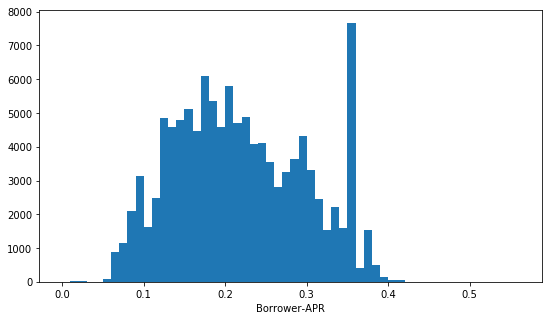

In [9]:
bins = np.arange(0, loan_sub.BorrowerAPR.max()+0.05, 0.01)
plt.figure(figsize=[9, 5])
plt.hist(data = loan_sub, x = 'BorrowerAPR', bins = bins);
plt.xlabel('Borrower-APR');

The distribution of APR has many peaks. A small peak centered at 0.1, a large peak centered at 0.2, there is a very sharp peak between 0.35 and 0.36. Only very few loans have APR greater than 0.4.

In [10]:
# Check loans with APR greater than 0.4
loan_sub[loan_sub.BorrowerAPR>0.43]

,LoanOriginalAmount,BorrowerAPR,StatedMonthlyIncome,Term,ProsperRating (Alpha),EmploymentStatus,IsBorrowerHomeowner
18326,3000,0.45857,10000.000000,36,NaN,NaN,False
22195,1789,0.46201,2916.666667,36,NaN,NaN,False
36018,1500,0.51229,2838.000000,36,NaN,NaN,False
56761,3000,0.50633,0.000000,36,NaN,NaN,False
82043,3000,0.48873,1583.333333,36,NaN,NaN,False
103973,2800,0.45857,3750.000000,36,NaN,NaN,False


There are 6 borrowers with largest set of APR with a corresponding small loan amount.Prosper rating and employment status are not available, and isBorrowerHomeOwner is false.

* 2.	what is the distribution of LoanOriginalAmount

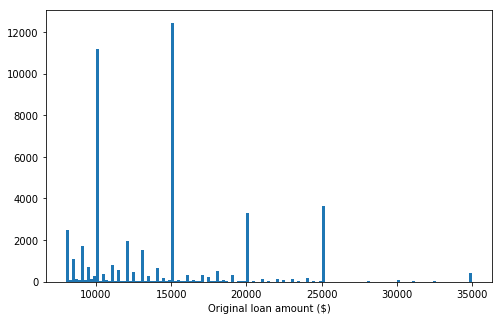

In [11]:
bins = np.arange(8000, loan_sub.LoanOriginalAmount.max()+200, 200)
plt.figure(figsize=[8, 5])
plt.hist(data = loan_sub, x = 'LoanOriginalAmount', bins = bins);
plt.xlabel('Original loan amount ($)');

The very large spikes in frequency are at 10k, 15k, 20k, 25k and 35k. There are also small spikes at 8000,9000,11000,12000,13000,14000 etc. It means that most of the loans are multiples of 10,000.

#### Distribution of other variables of interest: stated monthly income

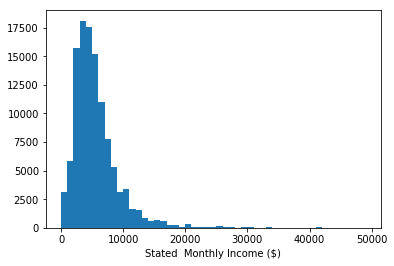

In [12]:
# Histogram Distribution of stated monthly income
bins = np.arange(0, 50000, 1000)
plt.hist(data = loan_sub, x = 'StatedMonthlyIncome', bins=bins);
plt.xlabel('Stated  Monthly Income ($)');

The distribution of stated-monthly-income is right screwed, with some zero amount, and most borrowers earning less thank 10k.

In [13]:
# Check borrowers with stated monthly income greater than 100k
loan_sub[loan_sub.StatedMonthlyIncome>100000]

,LoanOriginalAmount,BorrowerAPR,StatedMonthlyIncome,Term,ProsperRating (Alpha),EmploymentStatus,IsBorrowerHomeowner
8066,2000,0.35643,4.166667e+05,36,HR,Employed,True
8870,12500,0.12700,2.083333e+05,36,NaN,Not available,True
17411,7500,0.35643,4.833333e+05,36,E,Employed,True
35218,1000,0.07389,1.083333e+05,36,AA,Full-time,True
45028,4000,0.33973,1.500000e+05,36,E,Self-employed,False
53014,4000,0.25785,6.185478e+05,12,D,Self-employed,True
53167,4000,0.35797,1.750003e+06,36,HR,Self-employed,True
56867,25000,0.11144,1.850818e+05,36,NaN,Self-employed,True
57133,4000,0.35643,4.666667e+05,36,E,Employed,True
59298,15000,0.24246,1.208333e+05,36,C,Self-employed,False


In [14]:
# Get percent of borrowers whose stated monthly income greater than 30k
(loan_sub.StatedMonthlyIncome>30000).sum()/float(loan_sub.shape[0])

0.0028706369829341947

Less than 0.3 percent borrowers have stated monthly income greater than 30k, this could be outlier for the following analysis, so it is better to remove borrower records with income greater than 30k.

In [15]:
# remove loans with stated monthly income greater than 30k, which are outliers
loan_sub = loan_sub[loan_sub.StatedMonthlyIncome<=30000]

In [16]:
(loan_sub.StatedMonthlyIncome>30000).sum()

0

Distributions of term, Prosper rating and employment status

In [17]:
# Convert ProsperRating and Employment status into ordered categorical types
rate_order = ['HR','E','D','C','B','A','AA']
ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                    categories = rate_order)
loan_sub['ProsperRating (Alpha)'] = loan_sub['ProsperRating (Alpha)'].astype(ordered_var)

emp_order = ['Employed','Self-employed','Full-time','Part-time','Retired','Other','Not employed', 'Not available']
ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                    categories = emp_order)
loan_sub['EmploymentStatus'] = loan_sub['EmploymentStatus'].astype(ordered_var)

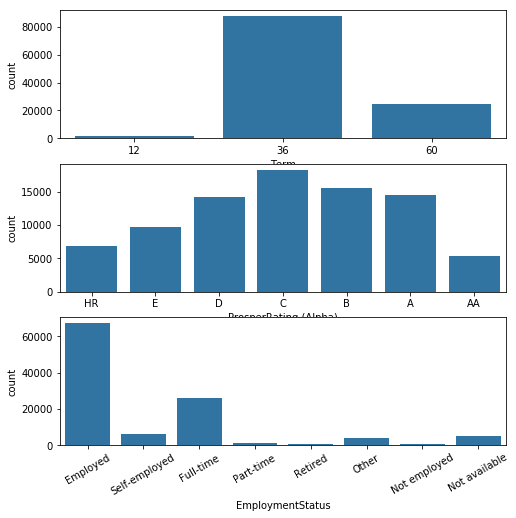

In [18]:
fig, ax = plt.subplots(nrows=3, figsize = [8,8])
default_color = sb.color_palette()[0]
sb.countplot(data = loan_sub, x = 'Term', color = default_color, ax = ax[0])
sb.countplot(data = loan_sub, x = 'ProsperRating (Alpha)', color = default_color, ax = ax[1])
sb.countplot(data = loan_sub, x = 'EmploymentStatus', color = default_color, ax = ax[2]);
plt.xticks(rotation=30);

The length of most of the loans are 36 months. The ratings of most of the borrowers are from D to A. Most borrowers are employed and full-time.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The distribution of borrowers APR looks multimodal. Most of the values are at the range of 0.05 and 0.4. There is no unusual point, hence no need to perform any transformations.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The distributions of stated monthly income is highly right screwed. Most stated monthly incomes are less than 30k, but some of them are incredibly high, like greater than 100k. Surprisingly, most of borrowers with greater than 100k monthly income only loan less than 5k dollars. So, the very large stated monthly income may be a data input error. Overall, Less than 0.3 percent borrowers have stated monthly income greater than 30k, these can be seemed as outlier for the our analysis, so I removed borrower records with income greater than 30k.

>There is no need to perform any transformations.

## Bivariate Exploration

We start off with looking at the pairwise correlations present between features in the data.

In [19]:
num_vars = ['LoanOriginalAmount', 'BorrowerAPR', 'StatedMonthlyIncome']
cat_vars = ['Term', 'IsBorrowerHomeowner', 'EmploymentStatus']

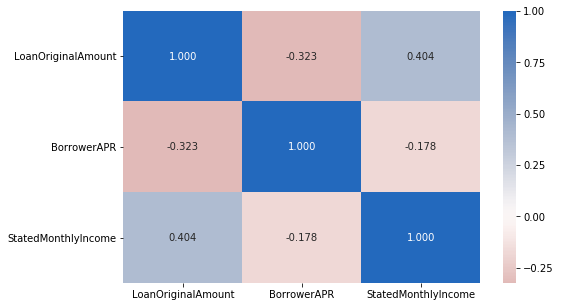

In [20]:
# correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(loan_sub[num_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0);

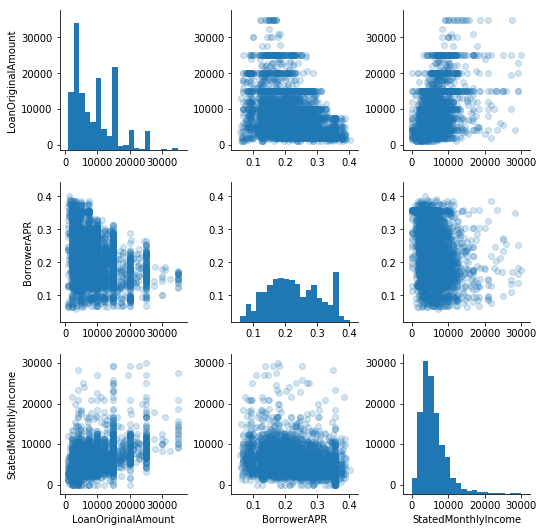

In [21]:
# plot matrix: sample 5000 loans so that plots are clearer and render faster
loan_sub_samp = loan_sub.sample(5000)
g = sb.PairGrid(data = loan_sub_samp.dropna(), vars = num_vars)
g = g.map_diag(plt.hist, bins=20)
g.map_offdiag(plt.scatter, alpha=0.2);

The coefficient of the correlation of borrower APR and loan original amount is -0.323, this is also shown in the scatter plot these two variables, which are negatively correlated, which is intandem with apriori expectation, since persons will borrow less when the cost of borrowing, which is APR is high. The loan original amount is positively correlated with the stated monthly income, since borrowers with more monthly income could borrow more money.

Moving on, lets look at how borrower APR, stated monthly income and loan original amount correlate with the categorical variables.

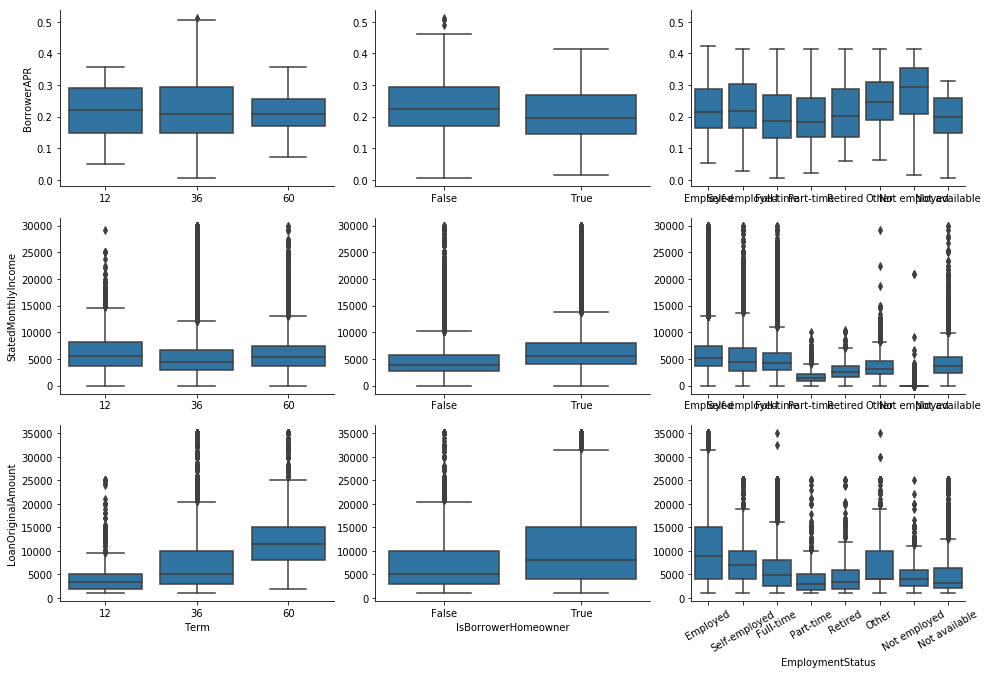

In [23]:
# plot matrix of numeric variables against categorical variables.

def boxgrid(x, y, **kwargs):
    #Quick hack for creating box plots with seaborn's PairGrid.
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color)

plt.figure(figsize = [10, 10])
g = sb.PairGrid(data = loan_sub, y_vars = ['BorrowerAPR', 'StatedMonthlyIncome', 'LoanOriginalAmount'], 
                x_vars = cat_vars, size = 3, aspect = 1.5)
g.map(boxgrid);
plt.xticks(rotation=30);

From the figures above,the loan amount increased with the increase of loan term. The borrower APR decreases with with borrowers that are home owners. Borrower APR is highest for unemployed. Borrowers with better rating also have larger monthly income and loan amount. Employed, self-employed and full time borrowers have more monthly income and loan amount than part-time, retired and not employed borrowers.

Further more, let's look at relationships between the three categorical features.

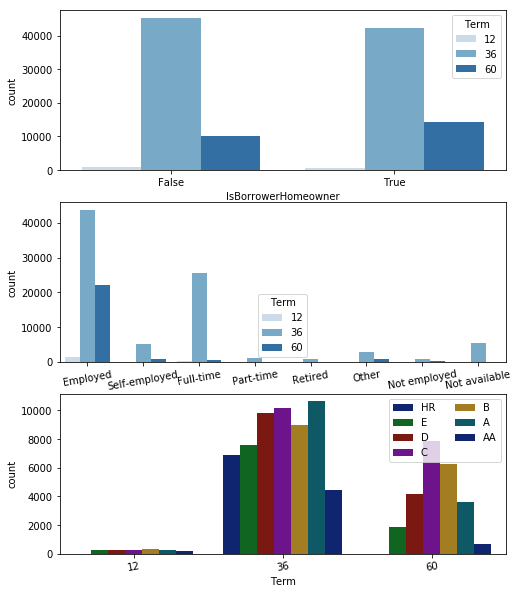

In [33]:
plt.figure(figsize = [8, 10])

# subplot 1: isBorrowerHomeowner vs term
plt.subplot(3, 1, 1)
sb.countplot(data = loan_sub, x = 'IsBorrowerHomeowner', hue = 'Term', palette = 'Blues')

# subplot 2: employment status vs. term
ax = plt.subplot(3, 1, 2)
sb.countplot(data = loan_sub, x = 'EmploymentStatus', hue = 'Term', palette = 'Blues')
plt.xticks(rotation=10)

# subplot 3: prosperRating vs. Term, use different color palette
ax = plt.subplot(3, 1, 3)
sb.countplot(data = loan_sub, x = 'Term', hue = 'ProsperRating (Alpha)', palette = 'dark')
ax.legend(loc = 1, ncol = 2); # re-arrange legend to remove overlapping
plt.xticks(rotation=10);

Employment status variable does not have sufficient data on part-time, retired and not employed borrowers to show its interaction with term and Prosper rating variables. But I can observe an interaction between term and Prosper rating. Proportionally, most borrowers are on the 36 months  loan term.

Let us see how borrower APR and loan original amount are related to one another for all of the data.

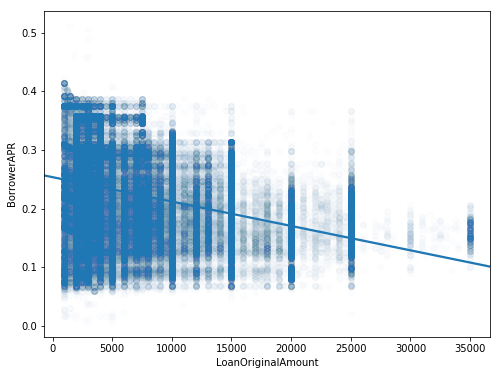

In [28]:
plt.figure(figsize = [8, 6])
sb.regplot(data = loan_sub, x = 'LoanOriginalAmount', y = 'BorrowerAPR', scatter_kws={'alpha':0.01});

The plot line shows an inversely proportionate relationtion between BorrowerAPE and Original loan.
The range of APR decrease with the increase of loan amount. The borrower APR is negatively correlated with loan amount.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The major feature of interest is borrower APR. it is negatively associated with the loan original amount, connoting that the lower the APR,the more the loan amount without feedback hypothetically, though causality was not tested explicitly here. The range of APR decrease with the increase of loan amount. The isBorrowerHomeowner also has a strong effect on the borrower APR, which has a negative corrolation.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Home owners and loan original variable are positively corrolated. Loan original amount is also positively correlated with the stated monthly income, This could be infered since borrowers with more monthly income could loan more money and home owners has better colateral . It also shows that borrowers with better rating also have larger monthly income and loan amount. Proportionally, there are more 60 month loans on C and B ratings. Most borrowers are on 36 months loans term.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

Here, I will like to explore in this part of the analysis is how the categorical variable (Home ownership and term) play into the relationship between borrower APR and loan original amount.

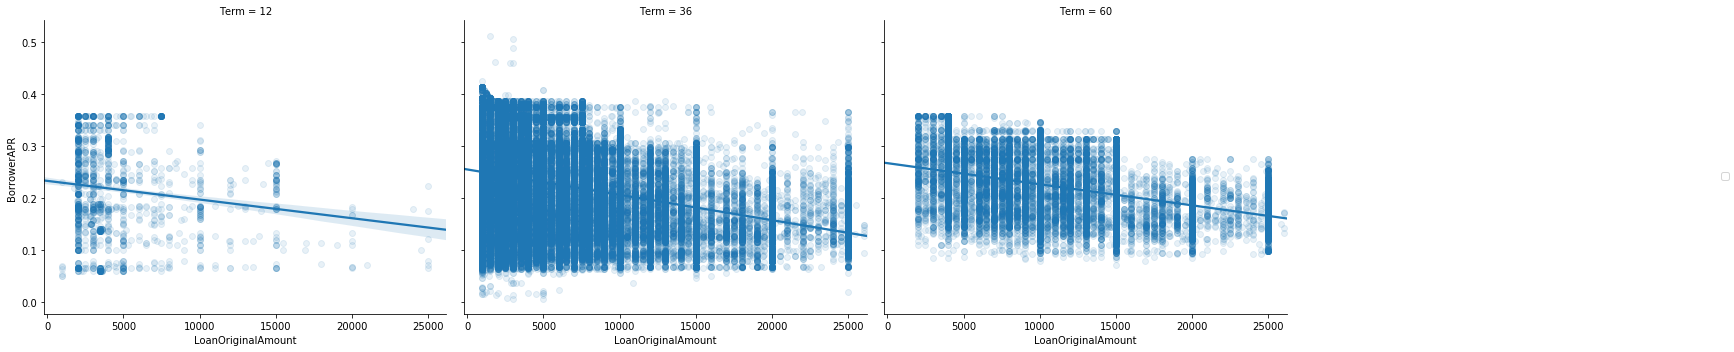

In [34]:
# Term effect on relationship of APR and loan amount
g=sb.FacetGrid(data=loan_sub, aspect=1.2, size=5, col='Term', col_wrap=4)
g.map(sb.regplot, 'LoanOriginalAmount', 'BorrowerAPR', x_jitter=0.04, scatter_kws={'alpha':0.1});
g.add_legend();


From the plot above, Loan Original decrease with increase in BorrowersAPR on all loan terms. We can conclude that term does not have a very significant effect on the relationship between APR and loan amount

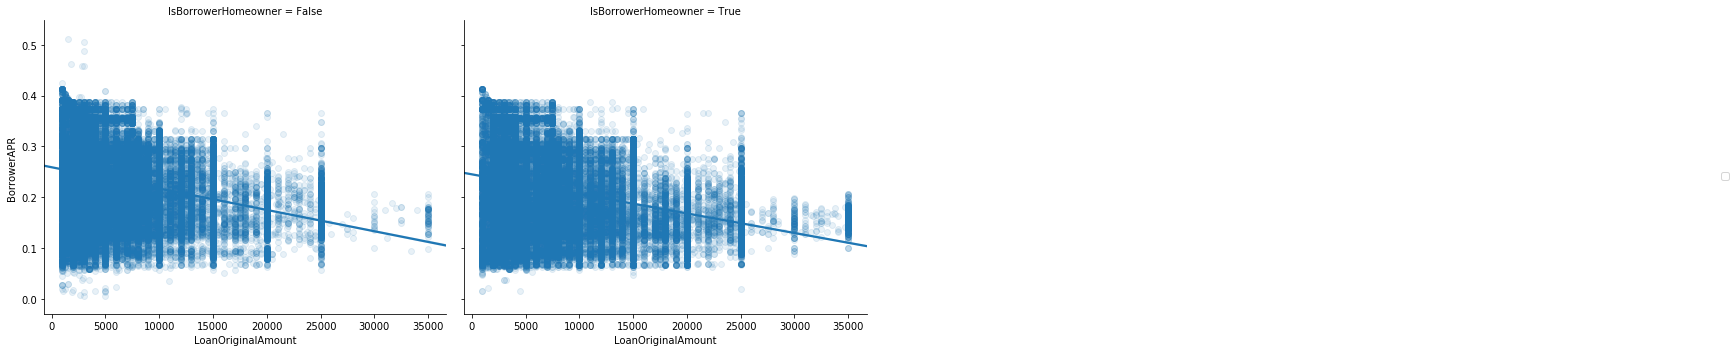

In [35]:
# IsBorrowerHomeowner effect on relationship of APR and loan amount
g=sb.FacetGrid(data=loan_sub, aspect=1.2, size=5, col='IsBorrowerHomeowner', col_wrap=4)
g.map(sb.regplot, 'LoanOriginalAmount', 'BorrowerAPR', x_jitter=0.04, scatter_kws={'alpha':0.1});
g.add_legend();

From the plot above, Loan Original decrease with increase in BorrowersAPR whether the borrower is a home owener or not . I can conclude that isOwnerHomeowner does not have a very significant effect on the relationship between APR and loan amount. I believe that these responses are already considered in deciding the APR, hence woul go in the same direction with the impacts of APR.

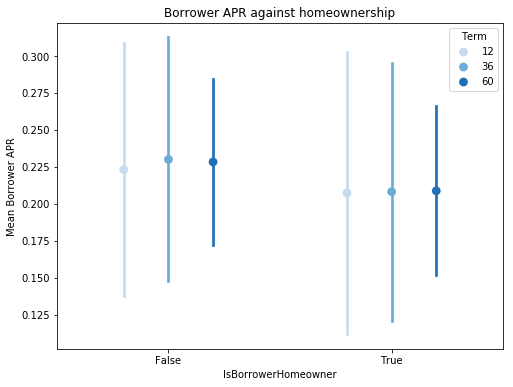

In [37]:
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = loan_sub, x = 'IsBorrowerHomeowner', y = 'BorrowerAPR', hue = 'Term',
           palette = 'Blues', linestyles = '', dodge = 0.4, ci='sd')
plt.title('Borrower APR against homeownership')
plt.ylabel('Mean Borrower APR')
ax.set_yticklabels([],minor = True);

As seen above, the borrower APR decrease for borrowers that are home owners on all loan terms.

Moreso, let's  look at the homeownership and term effects on stated monthly income and loan original amount variables

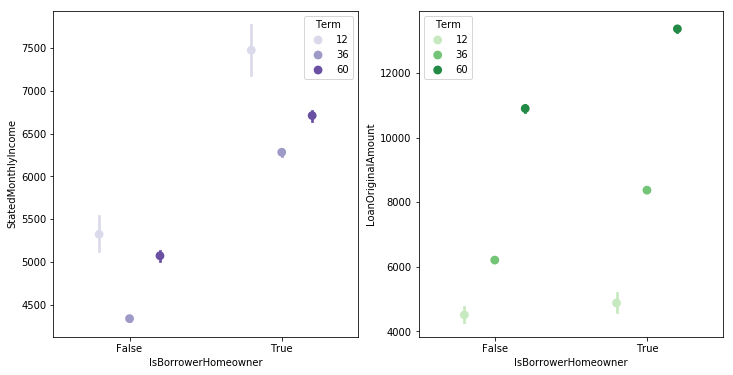

In [38]:
fig, ax = plt.subplots(ncols=2, figsize=[12,6])
sb.pointplot(data = loan_sub, x = 'IsBorrowerHomeowner',
             y = 'StatedMonthlyIncome', hue = 'Term',
           palette = 'Purples', linestyles = '', dodge = 0.4, ax=ax[0])
sb.pointplot(data = loan_sub, x = 'IsBorrowerHomeowner', 
             y = 'LoanOriginalAmount', hue = 'Term',
           palette = 'Greens', linestyles = '', dodge = 0.4, ax=ax[1]);

From the above plot, for both the stated monthly income and loan original amount, there are interaction effects between loan term and isBorrowerHomeowner. If the isBorrowerHomeowner is true, both the loan amount and stated monthly income increased.


### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> I investigated borrower APR against loan amount by looking at the impact of borrowers home ownership. The multivariate exploration showed that the relationship between borrower APR and loan amount is negative for home owners and positive for non home owners. I also explored the isOwnerHomeowner and term effects on loan amount, it shows that for home owners, the loan amount of all three terms increased. 

### Were there any interesting or surprising interactions between features?

> All interactions followed apriori expectation. The only interesting feature is the magnitude. I was expecting that being that the average defference between a homeowner APR and that of a non home owner will be huge but it wasn't. The difference is about 0.01%.


## Conclusions
>In the exploration, I discovered that the borrower APR is negatively correlated with original loan amount. At different size of the loan amount, the APR has a large range, but the range of APR decrease with the increase of loan amount. The borrower APR also decreases if the borrower is a home owner.  Interestingly, the relationship between borrower APR and loan amount turns from positive to  negative when isBorrowerHomeowner is true. This is may because of the colateral security that home ownership provides.

>Further more, beyound the main variables of interest, I found that the loan amount is positively correlated with the stated monthly income, it makes sense since borrowers with more monthly income could loan more money. The loan amount is also increased with the increase of loan term. I also found that borrowers with better ratings have larger monthly income and loan amount. Employed, self-employed and full time borrowers have more monthly income and loan amount than part-time, retired and not employed borrowers. there are interaction effects between loan term and isBorrowerHomeowner. If the isBorrowerHomeowner returns true, both the loan amount and stated monthly income increased. 